# Transcript B from Lecture, February 16, 2023

In [1]:
import sys

########################################
# Change the string in the line below! #
########################################
sys.path.append("/Users/gilbert/Documents/CS111-2023-winter/Python") 

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import networkx as nx
import json
import cs111

##########################################################
# If this import for matplotlib doesn't work, try saying #
#   conda install -c conda-forge ipympl                  #
# at a shell prompt on your computer                     #
##########################################################
import matplotlib
%matplotlib ipympl

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d



np.set_printoptions(precision = 4)

# Data fitting by least squares

## The surveyor problem

In [ ]:
A = np.array([[1,0,0],[0,1,0],[0,0,1],[-1,1,0],[-1,0,1],[0,-1,1]])
b = np.array([1237,1941,2417,711,1177,475])
print('A:'); print(A)
print('\nb:', b)

In [ ]:
x = npla.solve(A,b)

In [ ]:
x, resid, rank, sv = npla.lstsq(A, b, rcond = None)
x

In [ ]:
npla.lstsq?


In [ ]:
x = npla.lstsq(A, b, rcond = None)[0]
x

In [ ]:
b - A@x

In [ ]:
relres = npla.norm(b - A@x)/npla.norm(b)
print('relres =', relres)

In [ ]:
first_surveyor_x = np.array([1237,1941,2417])
relres = npla.norm(b - A @ first_surveyor_x)/npla.norm(b)
print("first surveyor's relres =", relres)

# Fitting a linear-regression line to data

<b>Warning: This data originated from a real source (SDSS), but it has been messed around with and should be thought of as only a toy example.

In [2]:
u = np.array([
24.41442,
25.67274,
26.02992,
23.00638,
24.86972,
21.96248,
21.87139,
24.93143,
22.90206,
22.749,
23.84269,
21.74025,
23.87719,
19.22808,
21.62093,
25.31738,
24.78468,
26.16757,
24.25187,
23.59213,
22.67077,
25.01685,
25.43069,
24.23741,
22.36275,
24.56208,
21.57241,
28.41815,
25.05081,
20.96467,
23.56018,
23.45984,
22.8903,
22.97415,
20.78101,
22.46072,
24.60077,
24.78432,
23.35197,
24.09856,
25.7874,
22.36821,
24.50825,
22.06679,
16.63657,
24.38522,
26.19138,
21.29271])

z = np.array([
21.37779,
21.2569,
19.88106,
20.76563,
23.18144,
19.76097,
18.34194,
21.97318,
18.26459,
20.63926,
21.69268,
18.20393,
20.19502,
15.4874,
21.864,
22.357,
22.36432,
20.08167,
20.08758,
20.00934,
19.9816,
21.85483,
19.38139,
17.90937,
16.79848,
22.54093,
18.07866,
27.90404,
21.32371,
17.1744,
18.08388,
22.01883,
19.4599,
22.5115,
16.82848,
21.34581,
20.29847,
22.91343,
19.40759,
21.99136,
22.56684,
19.13174,
22.60053,
20.24307,
13.87426,
19.74682,
21.74273,
17.74383])/100

In [3]:
len(u)

48

In [4]:
len(z)

48

Text(0.5, 1.0, 'Hubble diagram: magnitude and red shift of astronomical objects')

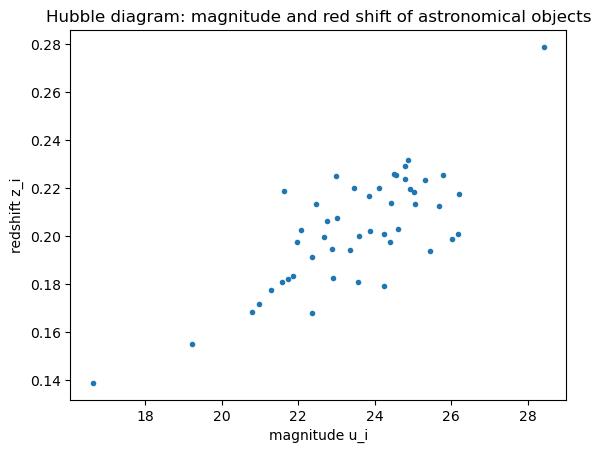

In [5]:
%matplotlib inline
plt.figure()
plt.plot(u,z,'.')
plt.xlabel('magnitude u_i')
plt.ylabel('redshift z_i')
plt.title('Hubble diagram: magnitude and red shift of astronomical objects')

In [6]:
m = len(u)
A = np.ones((m,2))
A[:,1] = u

b = z

print(f"A is a {A.shape[0]}-by-{A.shape[1]} matrix.\nb is a {len(b)}-vector.")

A is a 48-by-2 matrix.
b is a 48-vector.


In [7]:
A

array([[ 1.    , 24.4144],
       [ 1.    , 25.6727],
       [ 1.    , 26.0299],
       [ 1.    , 23.0064],
       [ 1.    , 24.8697],
       [ 1.    , 21.9625],
       [ 1.    , 21.8714],
       [ 1.    , 24.9314],
       [ 1.    , 22.9021],
       [ 1.    , 22.749 ],
       [ 1.    , 23.8427],
       [ 1.    , 21.7402],
       [ 1.    , 23.8772],
       [ 1.    , 19.2281],
       [ 1.    , 21.6209],
       [ 1.    , 25.3174],
       [ 1.    , 24.7847],
       [ 1.    , 26.1676],
       [ 1.    , 24.2519],
       [ 1.    , 23.5921],
       [ 1.    , 22.6708],
       [ 1.    , 25.0169],
       [ 1.    , 25.4307],
       [ 1.    , 24.2374],
       [ 1.    , 22.3627],
       [ 1.    , 24.5621],
       [ 1.    , 21.5724],
       [ 1.    , 28.4182],
       [ 1.    , 25.0508],
       [ 1.    , 20.9647],
       [ 1.    , 23.5602],
       [ 1.    , 23.4598],
       [ 1.    , 22.8903],
       [ 1.    , 22.9742],
       [ 1.    , 20.781 ],
       [ 1.    , 22.4607],
       [ 1.    , 24.6008],
 

In [8]:
x = npla.lstsq(A, b, rcond = None)[0]
x

array([-0.0113,  0.0091])

In [9]:
np.linspace(15,30,num=4)

array([15., 20., 25., 30.])

Text(0.5, 1.0, 'Hubble diagram: magnitude and red shift of astronomical objects')

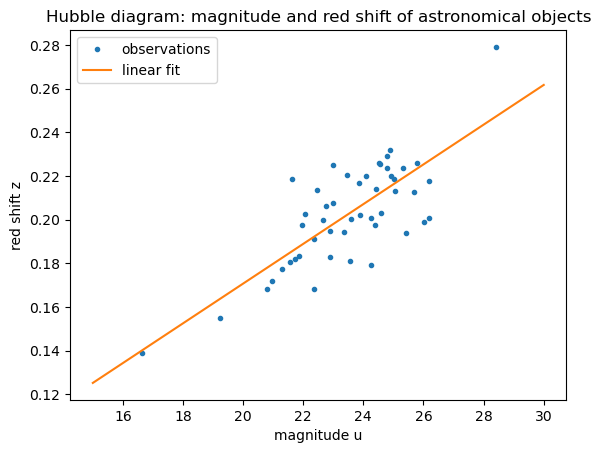

In [10]:
%matplotlib inline
plt.figure()
plt.plot(u,z,'.')
lineu = np.linspace(15,30,num=4)
linez = x[0] + x[1]*lineu
plt.plot(lineu,linez)
plt.xlabel('magnitude u')
plt.ylabel('red shift z')
plt.legend(('observations', 'linear fit'))
plt.title('Hubble diagram: magnitude and red shift of astronomical objects')

In [ ]:
x

## SVD and least squares

In [11]:
U,sigma,Vt = npla.svd(A)

print('singular values:', sigma)
print()

S = np.zeros(A.shape)
for i, s in enumerate(sigma):
    S[i,i] = s
    
V = Vt.T

print('U:'); print(U)
print()
print('S:'); print(S)
print()
print('V:'); print(V)

singular values: [163.7247   0.5805]

U:
[[-0.1492 -0.0523 -0.1322 ... -0.1406 -0.1314 -0.1562]
 [-0.1569 -0.1438 -0.1909 ... -0.0721 -0.2026  0.1514]
 [-0.1591 -0.1697  0.9569 ... -0.026  -0.0448  0.0063]
 ...
 [-0.1491 -0.0502 -0.0249 ...  0.9797 -0.0254 -0.0116]
 [-0.1601 -0.1814 -0.0449 ... -0.0265  0.9533  0.008 ]
 [-0.1302  0.1744  0.0093 ... -0.0096  0.0111  0.9548]]

S:
[[163.7247   0.    ]
 [  0.       0.5805]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.    

In [ ]:
npla.norm(A - U@S@V.T)

The least squares problem is to find the $x$ that minimizes the 2-norm $||Ax-b||_2$. We can use SVD to solve this, because multiplication by an orthogonal matrix doesn't change the 2-norm of a vector.

We want to minimize 

$$||Ax-b||_2 = ||USV^Tx-b||_2.$$

Multiplying by the orthogonal matrix $U^T$, this is the same as minimizing 

$$||U^TUSV^Tx - U^Tb||_2 = ||SV^Tx-U^Tb||_2.$$

Define $y=V^Tx$. Then if we can somehow find the $y$ that minimizes

$$||Sy - U^Tb||_2,$$

we can compute $x = Vy$ and we'll be done.

In [12]:
print('b:', b)
print()
print('U.T @ b:', U.T@b)

b: [0.2138 0.2126 0.1988 0.2077 0.2318 0.1976 0.1834 0.2197 0.1826 0.2064
 0.2169 0.182  0.202  0.1549 0.2186 0.2236 0.2236 0.2008 0.2009 0.2001
 0.1998 0.2185 0.1938 0.1791 0.168  0.2254 0.1808 0.279  0.2132 0.1717
 0.1808 0.2202 0.1946 0.2251 0.1683 0.2135 0.203  0.2291 0.1941 0.2199
 0.2257 0.1913 0.226  0.2024 0.1387 0.1975 0.2174 0.1774]

U.T @ b: [-1.4103 -0.0068 -0.0256  0.0089  0.0173  0.0076 -0.0058  0.0047 -0.0153
  0.0098  0.0111 -0.006  -0.0042 -0.012   0.0316  0.0052  0.0098 -0.0247
 -0.0085 -0.0037  0.0039  0.0028 -0.0255 -0.0301 -0.0254  0.0135 -0.0059
  0.0345 -0.0028 -0.0098 -0.0226  0.0176 -0.0032  0.0266 -0.0117  0.0193
 -0.0093  0.0153 -0.0076  0.0119  0.0034 -0.0021  0.0145  0.0116 -0.0062
 -0.013  -0.0083 -0.0069]


In [13]:
print('sigma:', sigma)
print()
print('S:'); print(S[:10,:]); print('...')

sigma: [163.7247   0.5805]

S:
[[163.7247   0.    ]
 [  0.       0.5805]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]
 [  0.       0.    ]]
...


The bottom part of $S$ is all zero. Therefore the bottom part of $Sy$ will be zero no matter what $y$ is, and the best we can do to minimize $||Sy - U^Tb||$ is to make the top part of $Sy$ match the top part of $U^Tb$.

That's easy because the top part of $S$ is diagonal.

In [14]:
print('top part of S:\n', S[:2,:])
print()
print('top part of U.T @ b:', (U.T@b)[:2])

top part of S:
 [[163.7247   0.    ]
 [  0.       0.5805]]

top part of U.T @ b: [-1.4103 -0.0068]


To solve $S_{top}y = (U^Tb)_{top}$ for $y$, just divide the right-hand side $(U^Tb)_{top}$ elementwise by the diagonal elements of $S_{top}$, which are the singular values.

In [15]:
y = (U.T @ b)[:2] / sigma

print('y:', y)

y: [-0.0086 -0.0116]


In [16]:
print('S @ y  :', (S@y)[:5], '...', (S@y)[-1])
print()
print('U.T @ b:', (U.T@b)[:5], '...', (U.T@b)[-1])

S @ y  : [-1.4103 -0.0068  0.      0.      0.    ] ... 0.0

U.T @ b: [-1.4103 -0.0068 -0.0256  0.0089  0.0173] ... -0.00686558838116616


Now the solution $x$ that minimizes $||Ax-b||_2$ is just $Vy$.

In [17]:
x = V@y

print('x from SVD:       ', x)
print()

print('x from npla.lstsq:', npla.lstsq(A, b, rcond=None)[0])

x from SVD:        [-0.0113  0.0091]

x from npla.lstsq: [-0.0113  0.0091]


We can compute the residual norm for the optimal solution $x$ in several different ways.

In [18]:
npla.norm(A@x - b)

0.1028936444623248

In [19]:
npla.norm(S@y - U.T@b)

0.10289364446232468

In [20]:
npla.norm((U.T@b)[2:])

0.10289364446232468

We use our new x from SVD to plot the least-squares line, and get the same picture we did with npla.lstsq

Text(0.5, 1.0, 'Hubble diagram: magnitude and red shift of astronomical objects')

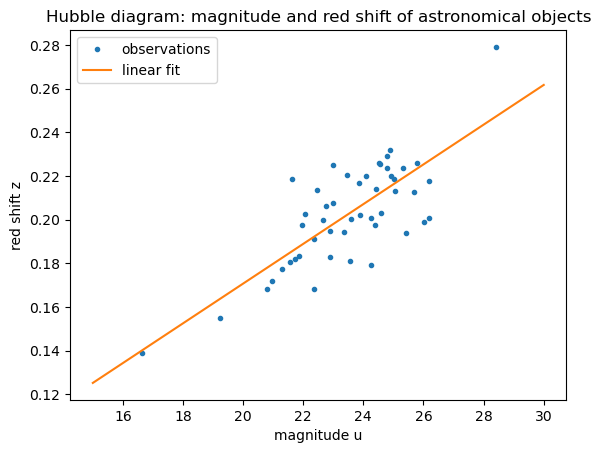

In [21]:
%matplotlib inline
plt.figure()
plt.plot(u,z,'.')
lineu = np.linspace(15,30,num=4)
linez = x[0] + x[1]*lineu
plt.plot(lineu,linez)
plt.xlabel('magnitude u')
plt.ylabel('red shift z')
plt.legend(('observations', 'linear fit'))
plt.title('Hubble diagram: magnitude and red shift of astronomical objects')

## The surveyors again, using SVD

In [ ]:
A = np.array([[1,0,0],[0,1,0],[0,0,1],[-1,1,0],[-1,0,1],[0,-1,1]])
b = np.array([1237,1941,2417,711,1177,475])
print('A:'); print(A)
print()
print('b:', b)

In [ ]:
U,sigma,Vt = npla.svd(A)

print('singular values:', sigma)
print()

S = np.zeros(A.shape)
for i, s in enumerate(sigma):
    S[i,i] = s
    
V = Vt.T

print('U:'); print(U)
print()
print('S:'); print(S)
print()
print('V:'); print(V)

In [ ]:
print('A:'); print(A)
print()
print('U @ S @ V.T:'); print(U @ S @ V.T)


In [ ]:
npla.norm(A - U@S@V.T)

In [ ]:
print('b:', b)
print()
print('U.T @ b:', U.T@b)

In [ ]:
print('sigma:', sigma)
print()
print('S:'); print(S)

In [ ]:
print('first 3 elements of U.T @ b:', (U.T @ b)[:3])

In [ ]:
y = (U.T @ b)[:3] / sigma

print('y:', y)

In [ ]:
x = V@y

print('x:', x)

In [ ]:
print('npla.lstsq x:', npla.lstsq(A, b, rcond=None)[0])

In [ ]:
npla.norm(A@x - b)

In [ ]:
npla.norm(S@y - U.T@b)

In [ ]:
print('S@y:', S@y)
print()
print('U.T@b:', U.T@b)
print()
print('S@y - U.T@b:', S@y - U.T@b)

In [ ]:
npla.norm((U.T@b)[3:])

In [ ]:
npla.lstsq?